# Prepare Shear

Prepare the shear waveform for ringdown analysis


1. Load the NR shear
1. Convert the NR delta_t to dimensionful delta_t
1. Find the scaling mass M that is necessary to achieve 1/sampling_freq delta_t
1. Make sure the length is upto analysis_duration


The analysis_duration is chosen to be 0.5s

Caveats
1. The QNM frequencies are not rescaled with the remnant mass of the system.

# Load the NR shear

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import config

config.conf_matplolib()


Msun = 2 * 1e30
G = 6.6743 * 1e-11
c = 2.99792458 * 1e8
Mrem = 1

Tc = G * Msun * Mrem / (c**3)

target_sf = 4096
target_delta_t = 1 / target_sf

MTSUN_SI = 4.925490947641267e-06

In [2]:
Tc, MTSUN_SI

(4.9542008619300655e-06, 4.925490947641267e-06)

In [3]:
analysis_duration = 0.5

In [4]:
sim_name = "q0p5a0_v"

In [5]:
data_dir = f"/mnt/pfs/vaishak.p/shear_data/{sim_name}/"

np_file = "quasilocalmeasures-qlm_newman_penrose..asc"

np_dat = np.genfromtxt(data_dir + np_file)

temp_time_axis = np_dat[:, 8]
orig_delta_t = temp_time_axis[1] - temp_time_axis[0]

try:
    bhdiag_file = "BH_diagnostics.ah3.gp"
    bhdiag_dat = np.genfromtxt(data_dir + bhdiag_file)

    bhdiag_dat[:, 1]

    merger_time = bhdiag_dat[0, 1]

except:
    merger_time = None

In [6]:
np_dat.shape, bhdiag_dat.shape, merger_time

NameError: name 'bhdiag_dat' is not defined

In [7]:
t_start = 115
t_end = 1250

start_ind = int(t_start / orig_delta_t)
end_ind = int(t_end / orig_delta_t)

print(start_ind, end_ind)

279 3038


In [8]:
data_time_axis = temp_time_axis[start_ind:end_ind] - temp_time_axis[start_ind]

shear2dat_p = np_dat[:, 26]
shear2dat_x = np_dat[:, 27]

if merger_time is None:
    merger_ind = np.where(np.diff(shear2dat_p) == 0)[0][0]
    print(merger_ind)
    merger_time = temp_time_axis[merger_ind]
    print(merger_time)

shear2dat_p_trunc = np_dat[start_ind:end_ind, 26]
shear2dat_x_trunc = np_dat[start_ind:end_ind, 27]

3473
1428.74853943056


In [8]:
orig_delta_t

0.411387428572

In [9]:
if orig_delta_t is None:
    max_tloc = np.argmax(shear2dat_p_trunc**2 + shear2dat_x_trunc**2)

    if max_tloc < len(data_time_axis):
        print("Shortening")
        data_time_axis = data_time_axis[:max_tloc]
        shear2dat_p_trunc = shear2dat_p_trunc[:max_tloc]
        shear2dat_x_trunc = shear2dat_x_trunc[:max_tloc]

Shortening


In [9]:
max_tloc

NameError: name 'max_tloc' is not defined

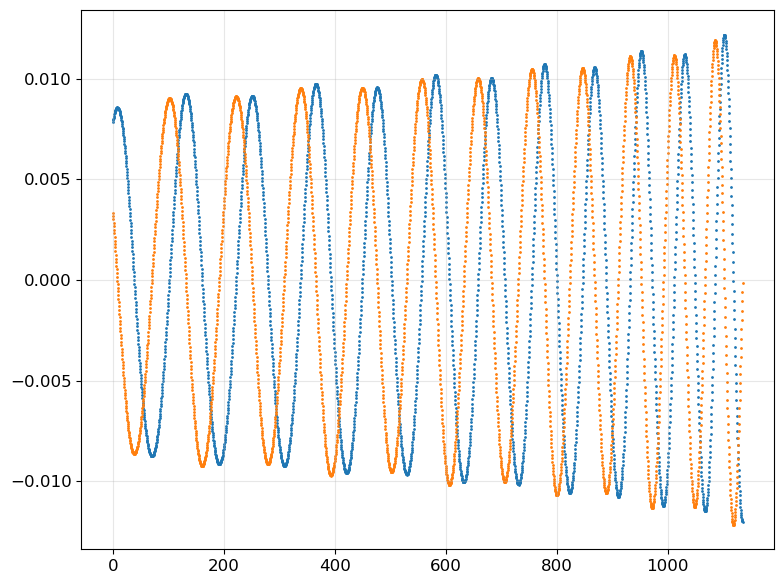

In [10]:
plt.scatter(data_time_axis, shear2dat_p_trunc, s=1)
plt.scatter(data_time_axis, shear2dat_x_trunc, s=1)
# plt.xlim(0, 1240)
# plt.ylim(-0.02, 0.02)
plt.show()

In [11]:
signal_segment_p = shear2dat_p_trunc
signal_segment_x = shear2dat_x_trunc

signal_segment = signal_segment_p + 1j * signal_segment_x

signal_phase = -np.unwrap(np.angle(signal_segment))

from waveformtools.differentiate import differentiate4

signal_omega = differentiate4(signal_phase, delta_t=orig_delta_t)

/mnt/pfs/vaishak.p/Projects/Codes/custom_libraries/waveformtools/waveformtools


/mnt/pfs/vaishak.p/soft/anaconda3_2023/envs/gw/lib/python3.11/site-packages/pycbc/types/array.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal as _lal


In [12]:
len(data_time_axis), len(signal_omega)

(2759, 2759)

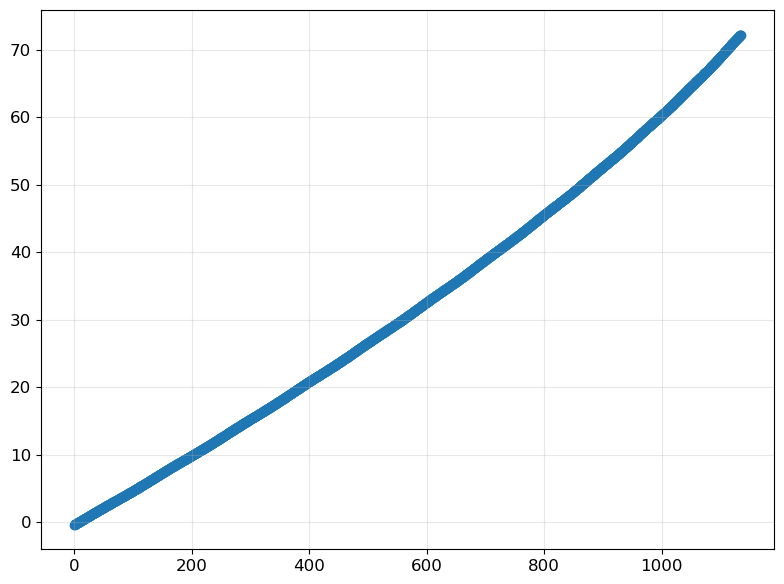

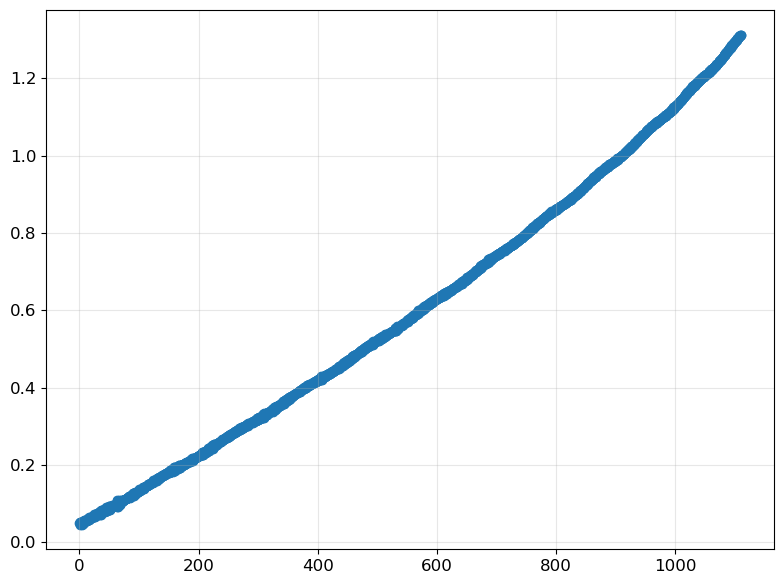

In [13]:
plt.scatter(data_time_axis, signal_phase)
plt.show()

plt.scatter(data_time_axis[:-60], signal_omega[:-60])
plt.show()

In [14]:
signal_freq = np.array(signal_omega) / (2 * np.pi)

In [17]:
data_time_axis_SI = data_time_axis[:] * MTSUN_SI

signal_p = shear2dat_p_trunc[:]
signal_x = shear2dat_x_trunc[:]

In [18]:
data_time_axis_SI[-1] - data_time_axis_SI[0]

0.005588494182806431

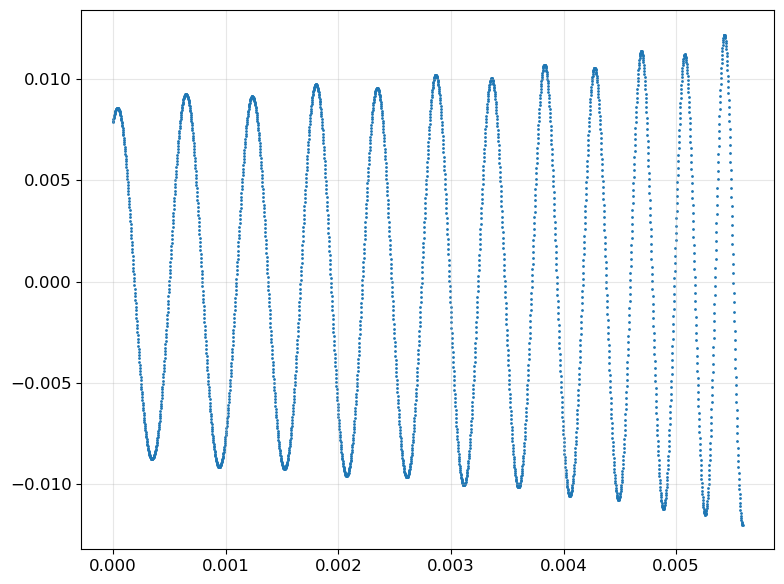

In [19]:
plt.scatter(data_time_axis_SI, signal_p, s=1)
plt.show()

In [20]:
f_lower_dat = np.mean(signal_freq[:10])

In [21]:
f_lower_SI = f_lower_dat / MTSUN_SI

f_lower_SI

1600.4425063177882

In [22]:
analysis_duration

0.5

In [23]:
target_delta_t

0.000244140625

In [25]:
orig_delta_t_SI = orig_delta_t * MTSUN_SI

# Nsamples = len(data_time_axis_SI)

# orig_dur_SI = Nsamples*orig_delta_t_SI

# Mtarget = (analysis_duration+ target_delta_t)/orig_dur_SI
Mtarget = target_delta_t / orig_delta_t_SI
Mtarget

120.4868112454328

In [29]:
analysis_duration

0.5

In [30]:
target_delta_t, 1 / 4096

(0.000244140625, 0.000244140625)

In [26]:
time_axis = data_time_axis_SI * Mtarget

In [27]:
time_axis[-1]

0.6733398437499977

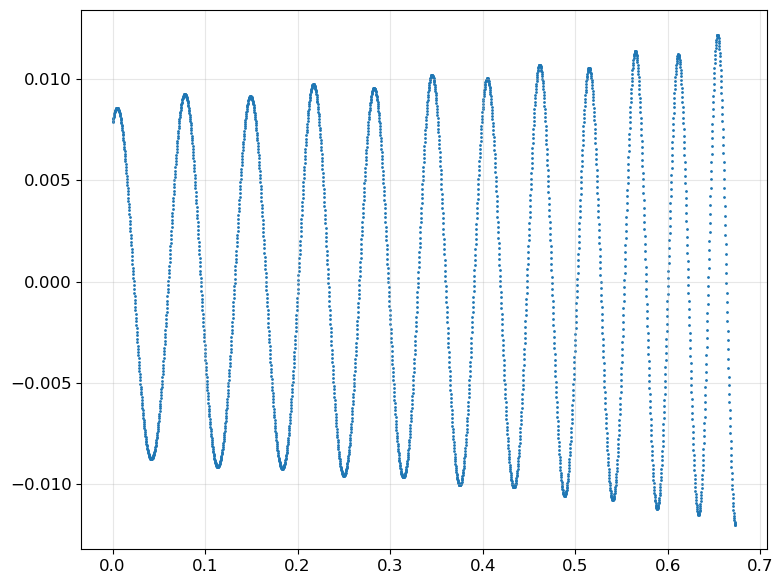

In [30]:
plt.scatter(time_axis, signal_p, s=1)
# plt.scatter(time_axis[:merger_ind], shear2_x[:merger_ind], s=1)
# plt.xlim(0, 1240)
# plt.ylim(-0.02, 0.02)
plt.show()

In [31]:
time_axis[-1] - time_axis[0]

0.6733398437499977

In [32]:
signal_phase2 = np.unwrap(np.angle(signal_p - 1j * signal_x))

signal_omega = differentiate4(signal_phase2, delta_t=target_delta_t)

In [33]:
f_lower_target = signal_omega[0] / (2 * np.pi)
f_lower_target

13.59781020745857

In [34]:
print("Signal duration", sht[-1])

NameError: name 'sht' is not defined

In [35]:
data = np.array([time_axis, signal_p, signal_x]).T

np.savetxt(f"shear_dimf_inspiral_{sim_name}_M{Mtarget}.txt", data)

In [111]:
time_axis[-1]

0.49981851179673503

In [36]:
Mtarget

120.4868112454328

In [70]:
sstart

45